In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/mtcars.csv")

<function matplotlib.pyplot.show>

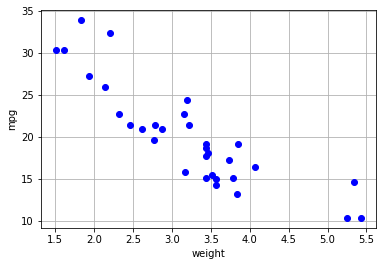

In [3]:
import matplotlib.pyplot as plt
plt.plot(df['wt'],df['mpg'],'bo')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.grid()
plt.show

In [6]:
x=np.array(df['wt'].values,'float')
y=np.array(df['mpg'].values,'float')

In [7]:
def myFnLinReg(x,y):
    x_mean = x.mean()
    y_mean=y.mean()
    b1 = (((x_mean-x)*(y_mean-y)).sum())/((x_mean-x)**2).sum()
    b0 = y_mean-b1*x_mean
    print(f'y = {b1}x + {b0}')
    return b1,b0
b1,b0 = myFnLinReg(x,y)
print("Y-intercept is :",b0)
print("X-coefficient is :",b1)

    

y = -5.344471572722677x + 37.285126167342035
Y-intercept is : 37.285126167342035
X-coefficient is : -5.344471572722677


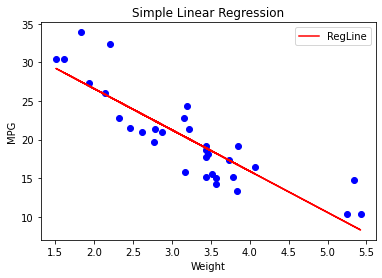

In [8]:
x=np.array(df['wt'])
y=np.array(df['mpg'].values,'float')
plt.plot(x,y,'bo')
plt.plot(x,b1*x+b0,'r',label='RegLine')
plt.title('Simple Linear Regression')

plt.legend()
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2,random_state=42)


In [10]:
a_train,b_train = myFnLinReg(x_train,y_train)

y = -5.336941400557081x + 36.93731031351841


In [11]:
print("MPG of the car of weight  ",5.5," is ",b0+b1*5.5)


MPG of the car of weight   5.5  is  7.890532517367312


In [12]:
def test_metrics(x_test,y_test,a_train,b_train):
    y_pred = (a_train*x_test+b_train)
    error = (y_test-y_pred)   # diff between original and predicted data
    y_mean = np.mean(y_test)
    rsme = np.sqrt((error**2).sum()/y_test.shape[0])
    r2 = 1-(error**2).sum()/((y_test-y_mean)**2).sum()
    return rsme,r2

In [13]:
rsme,r2 = test_metrics(x_test,y_test,a_train,b_train)
print(f'RSME = {rsme} and R2 = {r2}')

RSME = 3.5321361326991405 and R2 = 0.6879761857596272


In [14]:
X=np.array(df['wt'].values,'float')
y=np.array(df['mpg'].values,'float')

In [15]:
X=X.reshape(X.shape[0],1)
X = np.hstack([np.ones_like(X),X])
y=y.reshape(y.shape[0],1)
m = y.shape[0]
#hstack numpy function adds a column of 1s this is to get the constant b of linear regression equation-->y=ax+b

In [16]:
theta = np.zeros((2,1))
theta

array([[0.],
       [0.]])

In [17]:
import random
def stoch_gd(x,y,epochs, learning_rate = 0.001):
    total_samples = x.shape[0]
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = x[random_index]
        sample_y = y[random_index]

        y_predicted = theta[0][0]*sample_x + theta[1][0]
        theta0_grad = -(2/total_samples)*(sample_x*(sample_y-y_predicted))
        theta1_grad = -(2/total_samples)*(sample_y-y_predicted)
        theta[0][0] = theta[0][0] - learning_rate * theta0_grad
        theta[1][0] = theta[1][0] - learning_rate * theta1_grad
        
        cost = (sample_y-y_predicted)**2
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return theta, cost, cost_list, epoch_list

theta, cost_sgd, cost_list_sgd, epoch_list_sgd = stoch_gd(x_train,y_train,20000)
theta, cost_sgd

(array([[3.82736251],
        [5.65342126]]), 25.226794810253708)

In [18]:
rsme,r2 = test_metrics(x_test,y_test,theta[0][0],theta[1][0])
print(f'RSME = {rsme} and R2 = {r2}')

RSME = 9.637740633358073 and R2 = -1.323075602167282


In [19]:
# linear regression using "mini-batch" gradient descent

# function to compute gradient of error function w.r.t. theta
def gradient(X, y, theta):
    h = np.dot(X, theta) #Hypothesis
    grad = np.dot(X.T, (h - y))
    return grad

def cost(X, y, theta):
    h = np.dot(X, theta)
    J = (1/2)*np.dot((h - y).transpose(), (h - y))
    return J[0]
  
# function to create a list containing mini-batches
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
  
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

# function to perform mini-batch gradient descent
def gradientDescent_Mini(X, y, learning_rate = 0.001, batch_size = 8):
    cost_list=[]
    theta = np.zeros((2, 1))
    epoch_list=[]
    max_iters = 10
    for itr in range(max_iters):
        mini_batches = create_mini_batches(X, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta)
            cost_list.append(cost(X_mini, y_mini, theta))
  
    return theta, cost_list

In [20]:
x_train = x_train.reshape(25,1)
x_train = np.hstack([np.ones_like(x_train),x_train])
theta = np.zeros((2, 1))
y_train = y_train.reshape(25,1)

In [21]:
theta, cost_list_mb = gradientDescent_Mini(x_train,y_train)
theta

array([[2.12470301],
       [4.61838914]])